# 📊 **Data Mining Preliminary Project**

**Group Members**
- Nathanael Chris Abrigo
- Dwight Kenneth Cruz
- Joshua Kyle Kessel Entrata
- Edjin Jerney Payumo

#### **Importing Libraries**

In [52]:
### Importing Libraries

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Setup for the notebook
pd.set_option('display.max_columns', None)
%matplotlib inline


#### Load the preprocessed dataset

In [53]:
# Loading the 2023 FIES Dataset Volume 2
final_fies = pd.read_csv('../../data/processed/final_fies.csv')


In [54]:
final_fies

,W_REGN,W_PROV,SEQ_NO,RPROV,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,RENTALS_REC,INTEREST,PENSION,DIVIDENDS,OTHER_SOURCE,NET_RECEIPT,REGFT,NET_CFG,NET_LPR,NET_FISH,NET_FOR,NET_RET,NET_MFG,NET_TRANS,NET_NEC_A8,NET_NEC_A9,NET_NEC_A10,EAINC,LOSSES,BREAD,MEAT,FISH,MILK,OIL,FRUIT,VEG,SUGAR,FOOD_NEC,FRUIT_VEG,COFFEE,TEA,COCOA,WATER,SOFTDRINKS,OTHER_NON_ALCOHOL,ALCOHOL,TOBACCO,OTHER_VEG,SERVICES_PRIMARY_GOODS,ALCOHOL_PROCDUCTION_SERVICES,FOOD_HOME,FOOD_OUTSIDE,FOOD,CLOTH,HOUSING_WATER,ACTRENT,IMPUTED_RENT,BIMPUTED_RENT,RENTVAL,FURNISHING,HEALTH,TRANSPORT,COMMUNICATION,RECREATION,EDUCATION,INSURANCE,MISCELLANEOUS,DURABLE,OCCASION,OTHER_EXPENDITURE,OTHER_DISBURSEMENT,FOOD_ACCOM_SRVC,NFOOD,TOINC,TOTEX,TOTDIS,OTHREC,TOREC,RPSU,RFACT,MEM_RFACT,URB,PERCAPITA,NPCINC,RPCINC,PRPCINC,PPCINC,RPCINC_NIR,W_REGN_NIR,SOCIAL_CLASS
0,13,39,105930,3900,4.0,352200,0,352200,0,0,0,0,0,0,0,0,0,2276.0,0,0,0,0,0,0,0,0,0,0,0,0,27979.0,30420.0,16640.0,2020.0,4620.0,3340.0,8710.0,1595.0,2490.0,0.0,5475.0,0.0,0.0,2470.0,0.0,0.0,0.0,0.0,0.0,0,0,105759.0,81565.0,187324.0,2370,36660,0,15000,3000,18000,2674,1860,6344,8200,0,0,8166,7122,0,0,0,900,0,73396.0,369476.0,260720.0,261620.0,5000,374476.0,2151,405.804138,1479.726685,1,92369.000000,7,4,5,5,4,13,Low income
1,13,39,105931,3900,5.5,219760,0,219760,0,60000,0,80000,0,0,0,0,0,500.0,0,0,0,0,0,0,0,0,0,0,0,0,39031.0,24925.0,18200.0,8900.0,1565.0,4640.0,10450.0,660.0,1685.0,0.0,3215.0,0.0,0.0,1690.0,0.0,0.0,0.0,9200.0,0.0,0,0,114961.0,114000.0,228961.0,2650,70440,0,37800,0,37800,5510,21595,3720,13660,5080,0,0,14996,0,500,0,0,0,147351.0,398060.0,376312.0,376312.0,40000,438060.0,2151,405.804138,2034.624191,1,72374.546875,6,3,3,3,3,13,Lower-middle income
2,13,39,105932,3900,2.0,0,0,0,0,0,6000,0,0,0,0,0,0,500.0,0,0,0,0,156000,0,0,0,0,0,156000,0,20289.0,17320.0,8450.0,1630.0,1565.0,1430.0,22425.0,2085.0,2490.0,0.0,5475.0,0.0,0.0,2470.0,0.0,0.0,0.0,0.0,0.0,0,0,85629.0,10400.0,96029.0,2730,37380,6000,12000,0,18000,4742,1690,6500,5200,100,150,0,6654,0,1500,0,10000,0,66646.0,174500.0,162675.0,172675.0,8000,182500.0,2151,405.804138,739.863342,1,87250.000000,7,4,4,4,4,13,Poor
3,13,39,105933,3900,7.5,338800,0,338800,0,0,1000,0,0,0,0,0,0,200.0,0,0,0,0,0,0,84000,0,0,0,84000,0,37285.0,37050.0,31200.0,5125.0,1500.0,5230.0,5800.0,1055.0,3420.0,0.0,10956.0,0.0,0.0,1560.0,455.0,0.0,0.0,1840.0,0.0,0,0,140636.0,161600.0,302236.0,960,69760,0,48000,0,48000,3300,300,5668,7800,1820,0,0,14956,0,1100,0,5000,0,107504.0,472000.0,409740.0,414740.0,7500,479500.0,2151,405.804138,2774.487534,1,62933.332031,5,2,2,2,2,13,Lower-middle income
4,13,39,105934,3900,11.0,471720,0,471720,0,0,6600,0,0,0,0,0,0,0.0,0,0,0,0,312000,0,0,0,0,0,312000,0,53135.0,40040.0,50160.0,8610.0,2145.0,3510.0,17290.0,2857.0,2495.0,0.0,10950.0,0.0,0.0,3380.0,0.0,0.0,9360.0,0.0,0.0,0,0,194572.0,238080.0,432652.0,2200,61940,0,30000,0,30000,6118,1800,39000,15600,0,0,5826,17400,0,6000,4500,60900,0,169744.0,820320.0,602396.0,663296.0,55000,875320.0,2151,405.804138,4069.248383,1,74574.546875,6,3,3,3,3,13,Lower-middle income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19487,13,76,126615,7607,5.0,249360,0,249360,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,166500,0,0,0,166500,0,28555.0,21406.0,12900.0,16920.0,2820.0,1870.0,3640.0,1675.0,2830.0,0.0,3042.0,0.0,0.0,2600.0,870.0,0.0,5100.0,2600.0,0.0,0,0,99128.0,30700.0,129828.0,2410,105940,0,72000,0,72000,10174,5250,14300,12374,75,0,10800,16155,0,0,2000,3800,0,187178.0,487860.0,317006.0,320806.0,0,487860.0,780,216.904846,977.090073,1,97572.000000,7,5,4,5,5,13,Low income
19488,13,76,126616,7607,1.0,215720,0,215720,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,12363.0,6280.0,4070.0,1050.0,336.0,725.0,840.0,150.0

In [55]:
# Define the correct order for SOCIAL_CLASS
final_fies['SOCIAL_CLASS'] = pd.Categorical(
    final_fies['SOCIAL_CLASS'], 
    categories=['Poor', 'Low income', 'Lower-middle income', 'Middle income'], 
    ordered=True
)

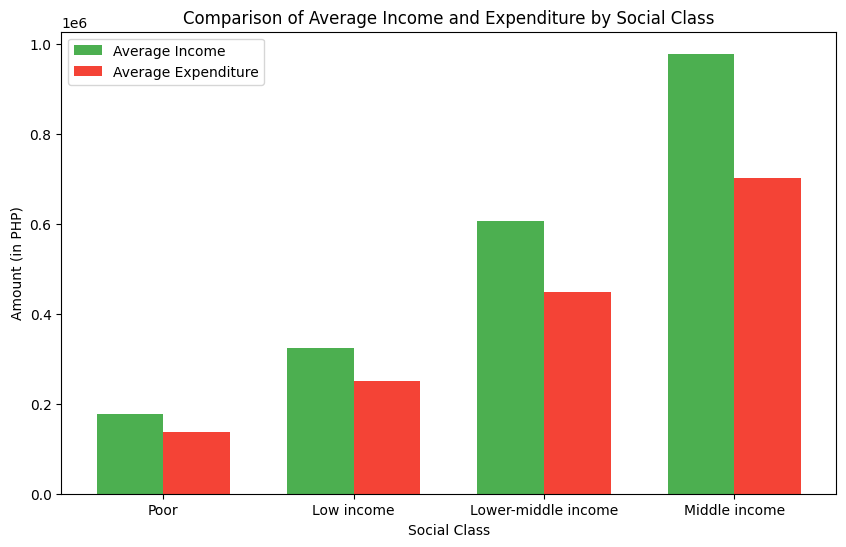

In [56]:
# Sample data (replace with your actual dataframe)
data = final_fies.groupby('SOCIAL_CLASS', observed=False)[['TOINC', 'TOTEX']].mean().reset_index()

# Bar width and x-axis positions
bar_width = 0.35
x = np.arange(len(data['SOCIAL_CLASS']))

# Create the grouped bar plot
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, data['TOINC'], width=bar_width, label='Average Income', color='#4CAF50')
plt.bar(x + bar_width/2, data['TOTEX'], width=bar_width, label='Average Expenditure', color='#F44336')

# Add labels and title
plt.xticks(x, data['SOCIAL_CLASS'])  # Align x-axis labels
plt.title('Comparison of Average Income and Expenditure by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Amount (in PHP)')
plt.legend()

# Display the graph
plt.show()


Comparison of Average Income and Expenditure by Social Class

This visualization shows the comparison between average income and expenses by social group. It shows a higher average for income in all social classes which can mean people in NCR can budget their money wisely.

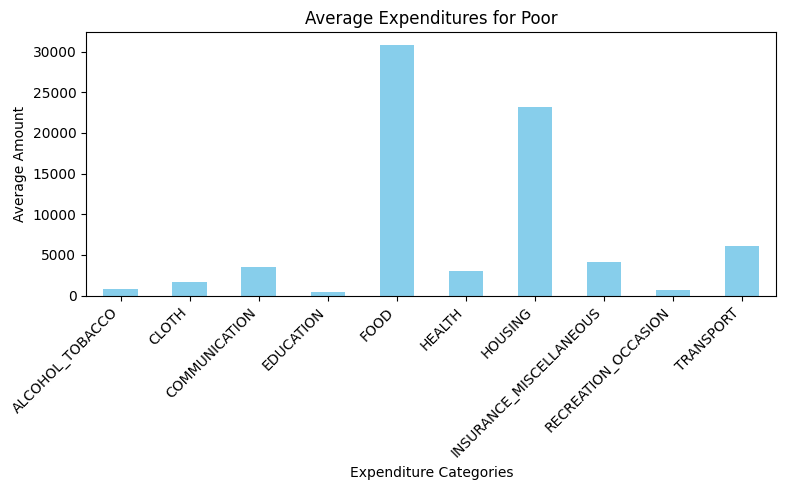

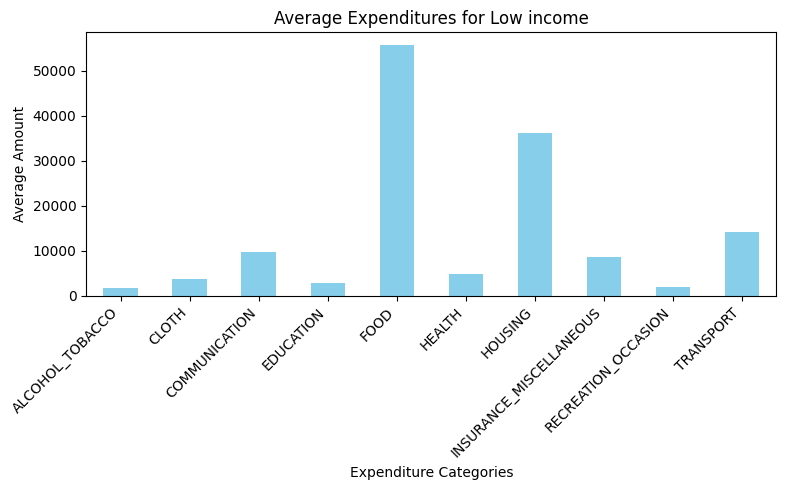

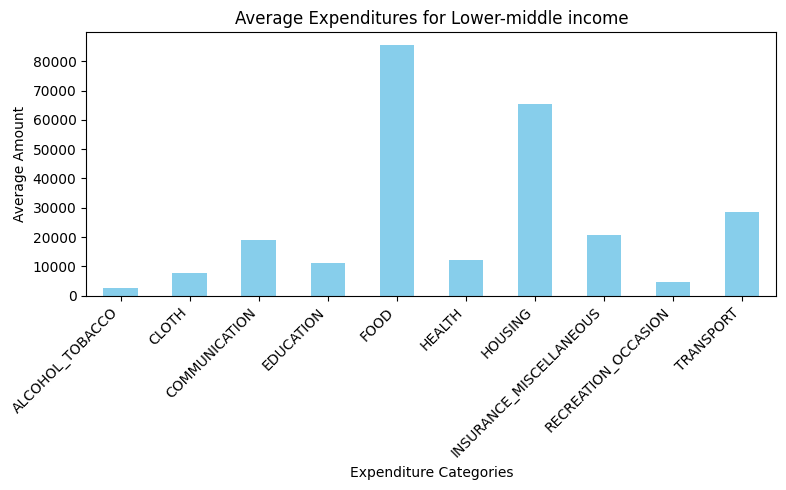

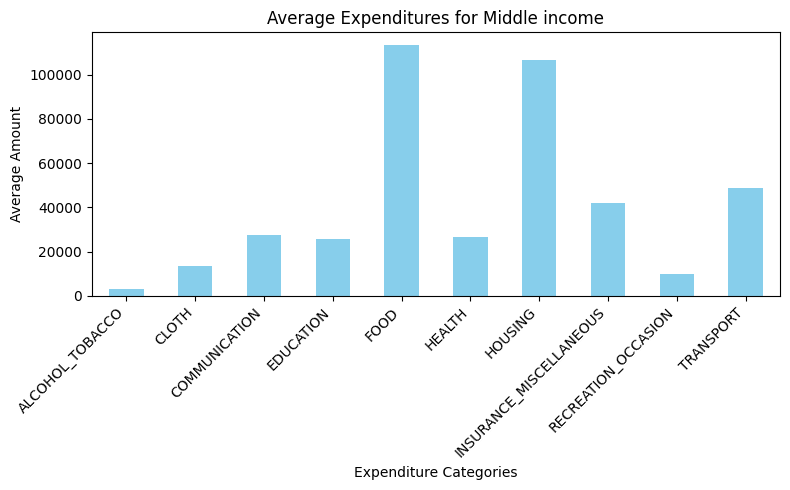

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregating averages directly
avg_expenditure = final_fies.groupby('SOCIAL_CLASS', observed=False).agg({
    'ALCOHOL': 'mean', 'TOBACCO': 'mean',
    'CLOTH': 'mean',
    'COMMUNICATION': 'mean',
    'EDUCATION': 'mean',
    'FOOD_HOME': 'mean', 'FOOD_OUTSIDE': 'mean',
    'HEALTH': 'mean',
    'HOUSING_WATER': 'mean', 'FURNISHING': 'mean', 'IMPUTED_RENT': 'mean',
    'INSURANCE': 'mean', 'MISCELLANEOUS': 'mean', 'OTHER_EXPENDITURE': 'mean', 'OTHER_DISBURSEMENT': 'mean',
    'RECREATION': 'mean', 'OCCASION': 'mean',
    'TRANSPORT': 'mean'
})

# Combine categories directly
avg_expenditure['ALCOHOL_TOBACCO'] = avg_expenditure[['ALCOHOL', 'TOBACCO']].mean(axis=1)
avg_expenditure['FOOD'] = avg_expenditure[['FOOD_HOME', 'FOOD_OUTSIDE']].mean(axis=1)
avg_expenditure['HOUSING'] = avg_expenditure[['HOUSING_WATER', 'FURNISHING', 'IMPUTED_RENT']].mean(axis=1)
avg_expenditure['RECREATION_OCCASION'] = avg_expenditure[['RECREATION', 'OCCASION']].mean(axis=1)
avg_expenditure['INSURANCE_MISCELLANEOUS'] = avg_expenditure[['INSURANCE','MISCELLANEOUS', 'OTHER_EXPENDITURE', 'OTHER_DISBURSEMENT']].mean(axis=1)

# Selecting only the required columns
avg_expenditure = avg_expenditure[[
    'ALCOHOL_TOBACCO', 'CLOTH', 'COMMUNICATION', 'EDUCATION',
    'FOOD', 'HEALTH', 'HOUSING', 'INSURANCE_MISCELLANEOUS', 'RECREATION_OCCASION', 'TRANSPORT'
]]

# Plotting individual graphs for each social class
for social_class in avg_expenditure.index:
    plt.figure(figsize=(8, 5))
    avg_expenditure.loc[social_class].plot(kind='bar', color='skyblue')
    plt.title(f'Average Expenditures for {social_class}')
    plt.ylabel('Average Amount')
    plt.xlabel('Expenditure Categories')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


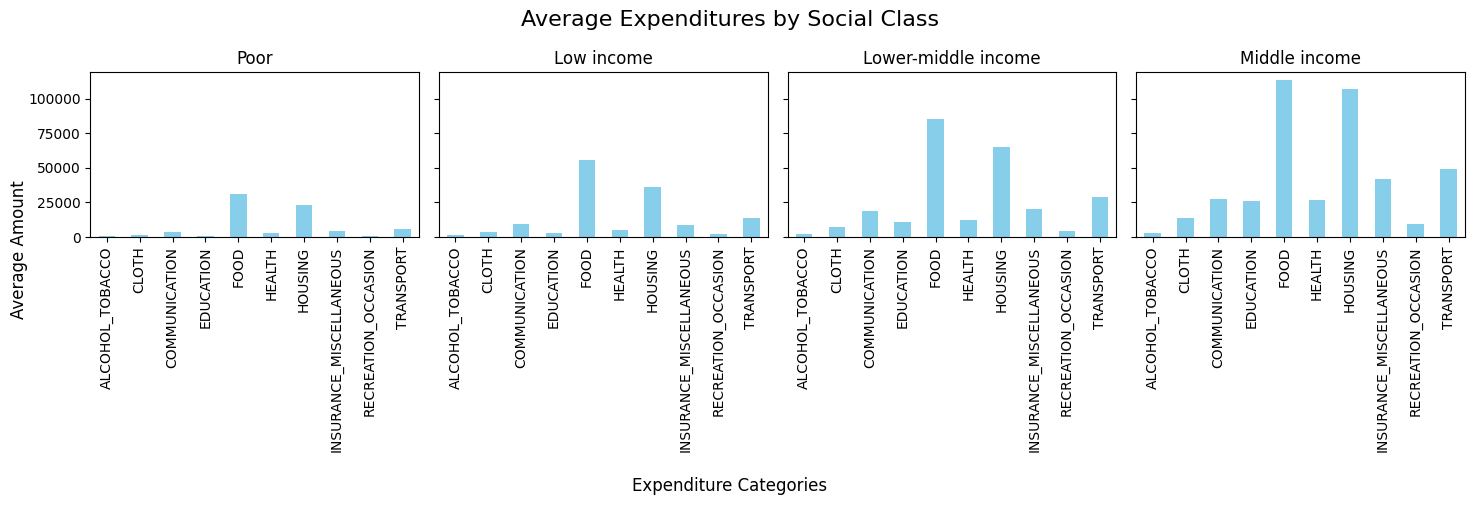

In [58]:
# Create subplots
num_classes = len(avg_expenditure)
fig, axes = plt.subplots(1, num_classes, figsize=(15, 5), sharey=True)

# Plot each social class in its own subplot
for ax, social_class in zip(axes, avg_expenditure.index):
    avg_expenditure.loc[social_class].plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'{social_class}')
    ax.set_xlabel('')

# Common labels
fig.suptitle('Average Expenditures by Social Class', fontsize=16)
fig.supxlabel('Expenditure Categories')
fig.supylabel('Average Amount')

plt.tight_layout()
plt.show()


Average Expenditures by Social Class

This visualization shows average expenditures by social class. it shows for all social classes that FOOD, HOUSING and TRANSPORT are the main expenditures. There is also a trend of higher average values for other details such as RECREATION_OCCASION which can mean the better social class standing, the more money can allocate for other necessities like cloths and budget for relaxation and occasions.